In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
# sys.path.append('/path/to/mlpractical')
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/Users/ycy/PycharmProjects/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/ycy/PycharmProjects/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


In [27]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47

hidden_dims = [32, 64, 128]  # 
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
stats_list = []
keys_list = []

for hidden_dim in hidden_dims:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    
    # Create model with ONE hidden layer
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])
    
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)
    
    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    
    stats_list.append(stats)
    keys_list.append(keys)
    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.7s to complete
    error(train)=1.23e+00, acc(train)=6.57e-01, error(valid)=1.24e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.7s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.12e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.6s to complete
    error(train)=1.01e+00, acc(train)=7.16e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.5s to complete
    error(train)=9.44e-01, acc(train)=7.30e-01, error(valid)=9.68e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.6s to complete
    error(train)=9.08e-01, acc(train)=7.38e-01, error(valid)=9.36e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.3s to complete
    error(train)=8.63e-01, acc(train)=7.48e-01, error(valid)=8.93e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.8s to complete
    error(train)=8.39e-01, acc(train)=7.54e-01, error(valid)=8.73e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.7s to complete
    error(train)=8.17e-01, acc(train)=7.59e-01, error(valid)=8.54e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.6s to complete
    error(train)=7.99e-01, acc(train)=7.64e-01, error(valid)=8.36e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.7s to complete
    error(train)=7.82e-01, acc(train)=7.68e-01, error(valid)=8.23e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.8s to complete
    error(train)=7.72e-01, acc(train)=7.71e-01, error(valid)=8.16e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.7s to complete
    error(train)=7.62e-01, acc(train)=7.73e-01, error(valid)=8.10e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.7s to complete
    error(train)=7.52e-01, acc(train)=7.76e-01, error(valid)=8.04e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.1s to complete
    error(train)=7.45e-01, acc(train)=7.77e-01, error(valid)=7.96e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.9s to complete
    error(train)=7.39e-01, acc(train)=7.77e-01, error(valid)=7.95e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.6s to complete
    error(train)=7.24e-01, acc(train)=7.82e-01, error(valid)=7.84e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.9s to complete
    error(train)=7.17e-01, acc(train)=7.81e-01, error(valid)=7.78e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.8s to complete
    error(train)=7.12e-01, acc(train)=7.84e-01, error(valid)=7.76e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.6s to complete
    error(train)=7.17e-01, acc(train)=7.81e-01, error(valid)=7.82e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.7s to complete
    error(train)=6.98e-01, acc(train)=7.86e-01, error(valid)=7.63e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.3s to complete
    error(train)=7.00e-01, acc(train)=7.85e-01, error(valid)=7.67e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.6s to complete
    error(train)=6.90e-01, acc(train)=7.89e-01, error(valid)=7.59e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.6s to complete
    error(train)=6.82e-01, acc(train)=7.92e-01, error(valid)=7.54e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.8s to complete
    error(train)=6.77e-01, acc(train)=7.92e-01, error(valid)=7.49e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.1s to complete
    error(train)=6.75e-01, acc(train)=7.92e-01, error(valid)=7.51e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.7s to complete
    error(train)=6.76e-01, acc(train)=7.93e-01, error(valid)=7.53e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.0s to complete
    error(train)=6.62e-01, acc(train)=7.97e-01, error(valid)=7.34e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.7s to complete
    error(train)=6.56e-01, acc(train)=7.98e-01, error(valid)=7.32e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.6s to complete
    error(train)=6.50e-01, acc(train)=8.00e-01, error(valid)=7.28e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.7s to complete
    error(train)=6.52e-01, acc(train)=8.00e-01, error(valid)=7.34e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.5s to complete
    error(train)=6.47e-01, acc(train)=8.01e-01, error(valid)=7.25e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.8s to complete
    error(train)=6.39e-01, acc(train)=8.05e-01, error(valid)=7.19e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.8s to complete
    error(train)=6.37e-01, acc(train)=8.04e-01, error(valid)=7.21e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.3s to complete
    error(train)=6.42e-01, acc(train)=8.00e-01, error(valid)=7.25e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.4s to complete
    error(train)=6.41e-01, acc(train)=8.00e-01, error(valid)=7.23e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.3s to complete
    error(train)=6.31e-01, acc(train)=8.06e-01, error(valid)=7.13e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.7s to complete
    error(train)=6.30e-01, acc(train)=8.05e-01, error(valid)=7.16e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.3s to complete
    error(train)=6.34e-01, acc(train)=8.01e-01, error(valid)=7.19e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.2s to complete
    error(train)=6.20e-01, acc(train)=8.09e-01, error(valid)=7.09e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.4s to complete
    error(train)=6.18e-01, acc(train)=8.09e-01, error(valid)=7.08e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.9s to complete
    error(train)=6.17e-01, acc(train)=8.08e-01, error(valid)=7.09e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.3s to complete
    error(train)=6.16e-01, acc(train)=8.08e-01, error(valid)=7.10e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.6s to complete
    error(train)=6.10e-01, acc(train)=8.09e-01, error(valid)=7.05e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.8s to complete
    error(train)=6.11e-01, acc(train)=8.10e-01, error(valid)=7.06e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.5s to complete
    error(train)=6.13e-01, acc(train)=8.08e-01, error(valid)=7.09e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.6s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=7.01e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.2s to complete
    error(train)=6.03e-01, acc(train)=8.11e-01, error(valid)=6.96e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.9s to complete
    error(train)=6.06e-01, acc(train)=8.10e-01, error(valid)=7.03e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.0s to complete
    error(train)=6.00e-01, acc(train)=8.14e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.8s to complete
    error(train)=5.99e-01, acc(train)=8.14e-01, error(valid)=6.97e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.6s to complete
    error(train)=5.93e-01, acc(train)=8.15e-01, error(valid)=6.93e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.9s to complete
    error(train)=5.95e-01, acc(train)=8.14e-01, error(valid)=6.93e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.5s to complete
    error(train)=5.95e-01, acc(train)=8.15e-01, error(valid)=6.99e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.6s to complete
    error(train)=5.95e-01, acc(train)=8.13e-01, error(valid)=6.98e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.6s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=7.00e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.5s to complete
    error(train)=5.92e-01, acc(train)=8.15e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.9s to complete
    error(train)=5.87e-01, acc(train)=8.15e-01, error(valid)=6.89e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.6s to complete
    error(train)=5.87e-01, acc(train)=8.17e-01, error(valid)=6.94e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.1s to complete
    error(train)=5.89e-01, acc(train)=8.16e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.6s to complete
    error(train)=5.86e-01, acc(train)=8.15e-01, error(valid)=6.95e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.5s to complete
    error(train)=5.82e-01, acc(train)=8.17e-01, error(valid)=6.89e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.5s to complete
    error(train)=5.81e-01, acc(train)=8.17e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.4s to complete
    error(train)=5.79e-01, acc(train)=8.19e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.7s to complete
    error(train)=5.81e-01, acc(train)=8.17e-01, error(valid)=6.93e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.5s to complete
    error(train)=5.91e-01, acc(train)=8.11e-01, error(valid)=7.04e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.7s to complete
    error(train)=5.84e-01, acc(train)=8.17e-01, error(valid)=6.96e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.9s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=6.91e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.8s to complete
    error(train)=5.76e-01, acc(train)=8.18e-01, error(valid)=6.95e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.3s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=6.93e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.7s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=6.97e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.3s to complete
    error(train)=5.84e-01, acc(train)=8.16e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.4s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.7s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=6.90e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.1s to complete
    error(train)=5.76e-01, acc(train)=8.16e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.7s to complete
    error(train)=5.73e-01, acc(train)=8.18e-01, error(valid)=6.92e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.7s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=6.93e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.8s to complete
    error(train)=5.73e-01, acc(train)=8.18e-01, error(valid)=6.94e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.7s to complete
    error(train)=5.71e-01, acc(train)=8.20e-01, error(valid)=6.90e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.5s to complete
    error(train)=5.70e-01, acc(train)=8.21e-01, error(valid)=6.93e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.4s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.2s to complete
    error(train)=5.71e-01, acc(train)=8.17e-01, error(valid)=6.95e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.3s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.90e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.2s to complete
    error(train)=5.70e-01, acc(train)=8.19e-01, error(valid)=6.96e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.9s to complete
    error(train)=5.63e-01, acc(train)=8.22e-01, error(valid)=6.89e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.8s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=6.91e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.7s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=6.91e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.8s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.6s to complete
    error(train)=5.59e-01, acc(train)=8.23e-01, error(valid)=6.88e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.9s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.94e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.7s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=6.85e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.8s to complete
    error(train)=5.62e-01, acc(train)=8.21e-01, error(valid)=6.94e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.9s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=6.95e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.4s to complete
    error(train)=5.60e-01, acc(train)=8.21e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.9s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=6.96e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.8s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.92e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.9s to complete
    error(train)=5.54e-01, acc(train)=8.23e-01, error(valid)=6.90e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.7s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=6.95e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.6s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=6.90e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.6s to complete
    error(train)=5.59e-01, acc(train)=8.21e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.5s to complete
    error(train)=5.58e-01, acc(train)=8.23e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


    final error(train) = 5.58e-01
    final error(valid) = 6.94e-01
    final acc(train)   = 8.23e-01
    final acc(valid)   = 7.88e-01
    run time per epoch = 3.15


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.1s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.08e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.5s to complete
    error(train)=8.72e-01, acc(train)=7.49e-01, error(valid)=8.98e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.4s to complete
    error(train)=7.63e-01, acc(train)=7.75e-01, error(valid)=7.98e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.8s to complete
    error(train)=7.09e-01, acc(train)=7.87e-01, error(valid)=7.52e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.0s to complete
    error(train)=6.64e-01, acc(train)=8.00e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.2s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=6.86e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.2s to complete
    error(train)=6.06e-01, acc(train)=8.11e-01, error(valid)=6.74e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=6.59e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.5s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.2s to complete
    error(train)=5.53e-01, acc(train)=8.25e-01, error(valid)=6.41e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.6s to complete
    error(train)=5.46e-01, acc(train)=8.26e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.8s to complete
    error(train)=5.21e-01, acc(train)=8.33e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.2s to complete
    error(train)=5.20e-01, acc(train)=8.31e-01, error(valid)=6.25e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.7s to complete
    error(train)=5.05e-01, acc(train)=8.37e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.1s to complete
    error(train)=5.04e-01, acc(train)=8.37e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.2s to complete
    error(train)=4.88e-01, acc(train)=8.43e-01, error(valid)=6.01e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.7s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.2s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.96e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.1s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.96e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.1s to complete
    error(train)=4.74e-01, acc(train)=8.43e-01, error(valid)=6.03e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.92e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.3s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.90e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.95e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.6s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.98e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.4s to complete
    error(train)=4.45e-01, acc(train)=8.53e-01, error(valid)=5.94e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.8s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.90e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.4s to complete
    error(train)=4.30e-01, acc(train)=8.58e-01, error(valid)=5.85e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.7s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.86e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.8s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.90e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.4s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.93e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.3s to complete
    error(train)=4.30e-01, acc(train)=8.55e-01, error(valid)=6.01e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.1s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.7s to complete
    error(train)=4.17e-01, acc(train)=8.59e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.7s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.97e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.6s to complete
    error(train)=4.17e-01, acc(train)=8.58e-01, error(valid)=6.00e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.0s to complete
    error(train)=4.12e-01, acc(train)=8.60e-01, error(valid)=5.97e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.5s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.8s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.93e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.3s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.99e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.7s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.98e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.3s to complete
    error(train)=4.04e-01, acc(train)=8.64e-01, error(valid)=6.04e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.5s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=6.09e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.9s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=6.00e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.5s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=6.06e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.2s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=6.09e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.2s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=6.00e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.7s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=6.04e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.1s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=6.01e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.0s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=6.04e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.0s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=6.08e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.8s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=6.09e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.6s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=6.11e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.6s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=6.12e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.6s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=6.11e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.0s to complete
    error(train)=3.81e-01, acc(train)=8.69e-01, error(valid)=6.17e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.5s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=6.17e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.4s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=6.15e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.3s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=6.22e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.4s to complete
    error(train)=3.81e-01, acc(train)=8.69e-01, error(valid)=6.35e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.7s to complete
    error(train)=3.73e-01, acc(train)=8.74e-01, error(valid)=6.26e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.3s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=6.19e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.7s to complete
    error(train)=3.66e-01, acc(train)=8.74e-01, error(valid)=6.24e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.6s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=6.16e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.8s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=6.30e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.7s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=6.24e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.8s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=6.30e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.4s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=6.30e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.5s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=6.37e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.3s to complete
    error(train)=3.61e-01, acc(train)=8.75e-01, error(valid)=6.38e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.0s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=6.33e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.3s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=6.36e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.7s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=6.37e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.5s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=6.51e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.0s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=6.42e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.2s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=6.46e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=6.50e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.7s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=6.61e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.0s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=6.42e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 9.2s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=6.49e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.8s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=6.56e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.7s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=6.53e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.6s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=6.53e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.8s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=6.56e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.5s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=6.66e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.3s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=6.62e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.5s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=6.60e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.9s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=6.65e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.1s to complete
    error(train)=3.46e-01, acc(train)=8.78e-01, error(valid)=6.68e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.9s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=6.71e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.3s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=6.66e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.4s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=6.66e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.5s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=6.69e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.1s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=6.72e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.2s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=6.74e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.3s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=6.74e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.6s to complete
    error(train)=3.36e-01, acc(train)=8.83e-01, error(valid)=6.77e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.5s to complete
    error(train)=3.42e-01, acc(train)=8.80e-01, error(valid)=6.84e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.2s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=6.72e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.4s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=6.77e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.2s to complete
    error(train)=3.33e-01, acc(train)=8.83e-01, error(valid)=6.75e-01, acc(valid)=8.04e-01


    final error(train) = 3.33e-01
    final error(valid) = 6.75e-01
    final acc(train)   = 8.83e-01
    final acc(valid)   = 8.04e-01
    run time per epoch = 4.26


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.4s to complete
    error(train)=9.12e-01, acc(train)=7.38e-01, error(valid)=9.29e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.2s to complete
    error(train)=7.25e-01, acc(train)=7.83e-01, error(valid)=7.59e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.1s to complete
    error(train)=6.28e-01, acc(train)=8.07e-01, error(valid)=6.77e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.2s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=6.20e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.1s to complete
    error(train)=5.26e-01, acc(train)=8.31e-01, error(valid)=5.96e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.3s to complete
    error(train)=4.73e-01, acc(train)=8.41e-01, error(valid)=5.63e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.5s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.2s to complete
    error(train)=4.27e-01, acc(train)=8.57e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.4s to complete
    error(train)=4.06e-01, acc(train)=8.64e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.5s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=5.31e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.5s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.5s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.1s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.4s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=5.30e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.2s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.3s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=5.31e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.6s to complete
    error(train)=3.36e-01, acc(train)=8.83e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.2s to complete
    error(train)=3.37e-01, acc(train)=8.81e-01, error(valid)=5.33e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.5s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.2s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=5.37e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.4s to complete
    error(train)=3.23e-01, acc(train)=8.85e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.5s to complete
    error(train)=3.14e-01, acc(train)=8.89e-01, error(valid)=5.45e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.8s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=5.34e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.4s to complete
    error(train)=3.12e-01, acc(train)=8.88e-01, error(valid)=5.60e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.3s to complete
    error(train)=2.92e-01, acc(train)=8.96e-01, error(valid)=5.44e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.2s to complete
    error(train)=2.91e-01, acc(train)=8.96e-01, error(valid)=5.49e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.4s to complete
    error(train)=2.92e-01, acc(train)=8.97e-01, error(valid)=5.57e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.3s to complete
    error(train)=2.85e-01, acc(train)=8.98e-01, error(valid)=5.60e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.0s to complete
    error(train)=2.83e-01, acc(train)=8.97e-01, error(valid)=5.67e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.4s to complete
    error(train)=2.75e-01, acc(train)=9.03e-01, error(valid)=5.64e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.8s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=5.74e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 7.8s to complete
    error(train)=2.85e-01, acc(train)=8.97e-01, error(valid)=5.88e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.7s to complete
    error(train)=2.73e-01, acc(train)=9.01e-01, error(valid)=5.83e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.7s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=5.83e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.1s to complete
    error(train)=2.65e-01, acc(train)=9.05e-01, error(valid)=5.87e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.5s to complete
    error(train)=2.56e-01, acc(train)=9.07e-01, error(valid)=5.92e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.5s to complete
    error(train)=2.57e-01, acc(train)=9.06e-01, error(valid)=5.94e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.1s to complete
    error(train)=2.54e-01, acc(train)=9.07e-01, error(valid)=5.99e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.3s to complete
    error(train)=2.52e-01, acc(train)=9.08e-01, error(valid)=6.00e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.0s to complete
    error(train)=2.47e-01, acc(train)=9.11e-01, error(valid)=6.09e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.7s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=6.12e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.6s to complete
    error(train)=2.50e-01, acc(train)=9.07e-01, error(valid)=6.15e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.4s to complete
    error(train)=2.40e-01, acc(train)=9.13e-01, error(valid)=6.16e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.3s to complete
    error(train)=2.33e-01, acc(train)=9.15e-01, error(valid)=6.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.6s to complete
    error(train)=2.42e-01, acc(train)=9.11e-01, error(valid)=6.35e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.4s to complete
    error(train)=2.49e-01, acc(train)=9.06e-01, error(valid)=6.42e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 6.3s to complete
    error(train)=2.35e-01, acc(train)=9.13e-01, error(valid)=6.42e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.4s to complete
    error(train)=2.35e-01, acc(train)=9.14e-01, error(valid)=6.52e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.8s to complete
    error(train)=2.30e-01, acc(train)=9.14e-01, error(valid)=6.45e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.5s to complete
    error(train)=2.31e-01, acc(train)=9.15e-01, error(valid)=6.61e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.7s to complete
    error(train)=2.26e-01, acc(train)=9.16e-01, error(valid)=6.60e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.6s to complete
    error(train)=2.26e-01, acc(train)=9.16e-01, error(valid)=6.64e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 7.8s to complete
    error(train)=2.20e-01, acc(train)=9.19e-01, error(valid)=6.61e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.1s to complete
    error(train)=2.31e-01, acc(train)=9.15e-01, error(valid)=6.88e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.5s to complete
    error(train)=2.23e-01, acc(train)=9.18e-01, error(valid)=6.79e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.4s to complete
    error(train)=2.10e-01, acc(train)=9.23e-01, error(valid)=6.85e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.6s to complete
    error(train)=2.16e-01, acc(train)=9.19e-01, error(valid)=6.94e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.5s to complete
    error(train)=2.16e-01, acc(train)=9.19e-01, error(valid)=7.03e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.3s to complete
    error(train)=2.10e-01, acc(train)=9.21e-01, error(valid)=7.05e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.7s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.01e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.7s to complete
    error(train)=2.03e-01, acc(train)=9.24e-01, error(valid)=7.02e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.7s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=7.26e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.8s to complete
    error(train)=2.00e-01, acc(train)=9.25e-01, error(valid)=7.18e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.5s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=7.21e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.5s to complete
    error(train)=2.04e-01, acc(train)=9.24e-01, error(valid)=7.38e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.3s to complete
    error(train)=1.99e-01, acc(train)=9.24e-01, error(valid)=7.45e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.2s to complete
    error(train)=1.98e-01, acc(train)=9.25e-01, error(valid)=7.43e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.4s to complete
    error(train)=1.96e-01, acc(train)=9.26e-01, error(valid)=7.46e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.8s to complete
    error(train)=2.01e-01, acc(train)=9.23e-01, error(valid)=7.54e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.4s to complete
    error(train)=1.95e-01, acc(train)=9.25e-01, error(valid)=7.62e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.5s to complete
    error(train)=2.00e-01, acc(train)=9.24e-01, error(valid)=7.80e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.5s to complete
    error(train)=1.98e-01, acc(train)=9.25e-01, error(valid)=7.75e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 10.2s to complete
    error(train)=1.90e-01, acc(train)=9.29e-01, error(valid)=7.78e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.7s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=7.80e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.1s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=7.78e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.5s to complete
    error(train)=1.89e-01, acc(train)=9.28e-01, error(valid)=7.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 10.5s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=7.97e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.5s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.07e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.7s to complete
    error(train)=1.76e-01, acc(train)=9.34e-01, error(valid)=8.13e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.4s to complete
    error(train)=1.85e-01, acc(train)=9.28e-01, error(valid)=8.22e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.2s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=8.26e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.2s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.30e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.6s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.41e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.6s to complete
    error(train)=1.70e-01, acc(train)=9.36e-01, error(valid)=8.33e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.6s to complete
    error(train)=1.72e-01, acc(train)=9.36e-01, error(valid)=8.42e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.6s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=8.61e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.4s to complete
    error(train)=1.74e-01, acc(train)=9.33e-01, error(valid)=8.63e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 11.4s to complete
    error(train)=1.79e-01, acc(train)=9.31e-01, error(valid)=8.70e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.0s to complete
    error(train)=1.72e-01, acc(train)=9.33e-01, error(valid)=8.74e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.6s to complete
    error(train)=1.76e-01, acc(train)=9.31e-01, error(valid)=8.79e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.7s to complete
    error(train)=1.78e-01, acc(train)=9.31e-01, error(valid)=8.98e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.6s to complete
    error(train)=1.73e-01, acc(train)=9.32e-01, error(valid)=8.97e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.6s to complete
    error(train)=1.67e-01, acc(train)=9.35e-01, error(valid)=8.98e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 9.0s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.01e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 7.0s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=9.05e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.8s to complete
    error(train)=1.61e-01, acc(train)=9.38e-01, error(valid)=9.10e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.8s to complete
    error(train)=1.71e-01, acc(train)=9.33e-01, error(valid)=9.25e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.0s to complete
    error(train)=1.62e-01, acc(train)=9.38e-01, error(valid)=9.26e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.9s to complete
    error(train)=1.64e-01, acc(train)=9.37e-01, error(valid)=9.32e-01, acc(valid)=8.08e-01


    final error(train) = 1.64e-01
    final error(valid) = 9.32e-01
    final acc(train)   = 9.37e-01
    final acc(valid)   = 8.08e-01
    run time per epoch = 7.49


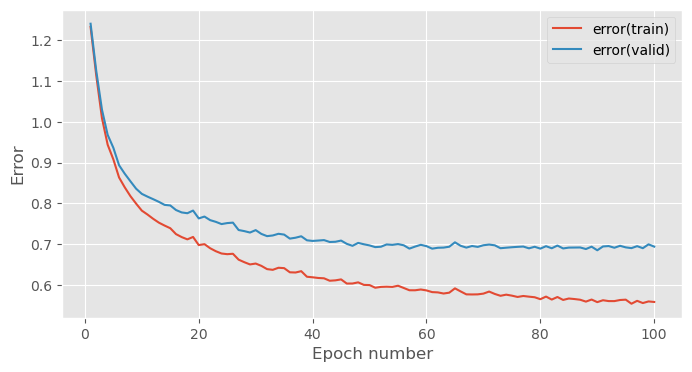

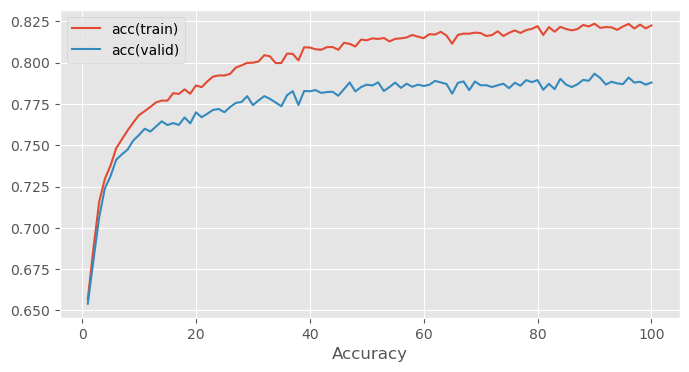

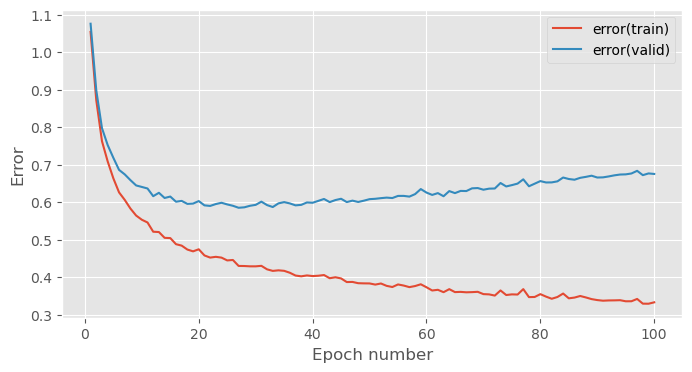

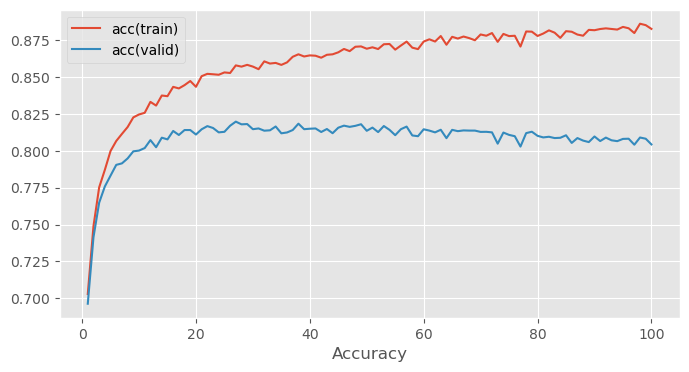

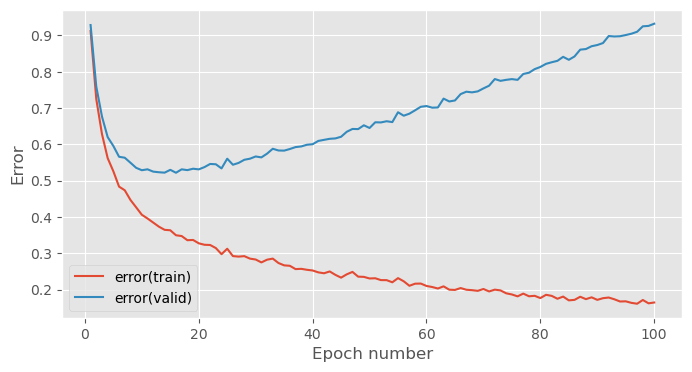

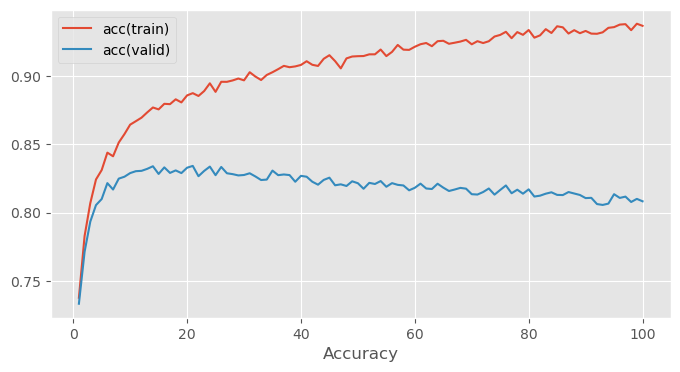

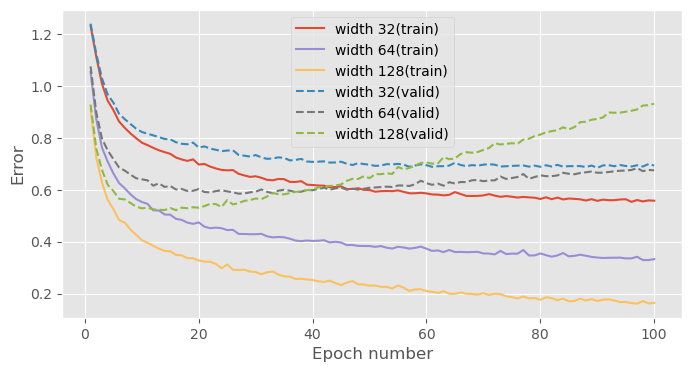

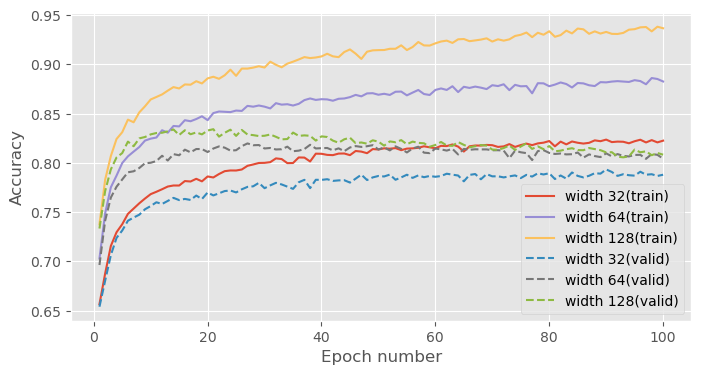

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_stats(stats_list, keys_list, hidden_dims, stats_interval):
    # 创建第一个图，用于绘制 Error（误差）
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    
    # 创建第二个图，用于绘制 Accuracy（准确率）
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)

    # 存储每个绘制的线条和标签，用于手动调整图例顺序
    lines_1 = []
    labels_1 = []
    lines_2 = []
    labels_2 = []

    # 对每个模型（不同隐藏层宽度）循环
    for i in range(len(stats_list)):
        stats = stats_list[i]
        keys = keys_list[i]
        hidden_dim = hidden_dims[i]
        
        # 绘制训练集和验证集的 Error（误差）
        for k in ['error(train)', 'error(valid)']:
            if k == 'error(train)':
                label = f'width {hidden_dim}(train)'
                style = '-'  # 实线
            else:
                label = f'width {hidden_dim}(valid)'
                style = '--'  # 虚线
            
            line, = ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                              stats[1:, keys[k]], label=label, linestyle=style)
            lines_1.append(line)
            labels_1.append(label)
        
        ax_1.set_xlabel('Epoch number')
        ax_1.set_ylabel('Error')

        # 绘制训练集和验证集的 Accuracy（准确率）
        for k in ['acc(train)', 'acc(valid)']:
            if k == 'acc(train)':
                label = f'width {hidden_dim}(train)'
                style = '-'  # 实线
            else:
                label = f'width {hidden_dim}(valid)'
                style = '--'  # 虚线
            
            line, = ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                              stats[1:, keys[k]], label=label, linestyle=style)
            lines_2.append(line)
            labels_2.append(label)
        
        ax_2.set_xlabel('Epoch number')
        ax_2.set_ylabel('Accuracy')

    # 手动控制图例顺序 (Error 图)
    ax_1.legend([lines_1[0], lines_1[2], lines_1[4], lines_1[1], lines_1[3], lines_1[5]],
                [labels_1[0], labels_1[2], labels_1[4], labels_1[1], labels_1[3], labels_1[5]])

    # 手动控制图例顺序 (Accuracy 图)
    ax_2.legend([lines_2[0], lines_2[2], lines_2[4], lines_2[1], lines_2[3], lines_2[5]],
                [labels_2[0], labels_2[2], labels_2[4], labels_2[1], labels_2[3], labels_2[5]])

    plt.show()
    fig_1.savefig('../outputs/task1-1-error.pdf')
    fig_2.savefig('../outputs/task1-1-accuracy.pdf')

# 示例调用
# 假设 stats_list, keys_list, hidden_dims, stats_interval 已经定义
plot_training_stats(stats_list, keys_list, hidden_dims, stats_interval)


In [32]:
j = 0
print('| hidden_dim | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|------------|--------------------|--------------------|------------------|------------------|')
for hidden_dim in hidden_dims:
    print('| {0}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
          .format(int(hidden_dim), 
                  final_errors_train[j], final_errors_valid[j],
                  final_accs_train[j], final_accs_valid[j]))
    j += 1

| hidden_dim | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|------------|--------------------|--------------------|------------------|------------------|
| 32        | 5.58e-01           | 6.94e-01           |  0.82            | 0.79             |
| 64        | 3.33e-01           | 6.75e-01           |  0.88            | 0.80             |
| 128        | 1.64e-01           | 9.32e-01           |  0.94            | 0.81             |
